In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

import seaborn as sns

In [2]:
suicide = pd.read_csv('master.csv')

In [71]:
suicide['HDI for year'].isna().sum()/suicide.shape[0] #checking ratio of NaN's in HDI

0.699352983465133

In [4]:
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [51]:
suicide.groupby(['country'])['suicides_no'].mean().sort_values(ascending=False)

country
Russian Federation              3733.771605
United States                   2779.604839
Japan                           2169.091398
Ukraine                          952.232143
Germany                          933.532051
France                           914.241667
Republic of Korea                703.575269
Brazil                           609.174731
Poland                           482.979167
Sri Lanka                        421.522727
United Kingdom                   367.755376
Italy                            355.000000
Thailand                         331.266467
Kazakhstan                       325.467949
Canada                           309.083333
Mexico                           298.760753
Spain                            269.360215
Hungary                          238.358065
Belarus                          237.666667
Argentina                        221.018817
Romania                          217.895210
Australia                        194.752778
Belgium                 

In [131]:
#sns.pairplot(suicide,hue='generation')

In [15]:
#pd.pivot_table(data = suicide,index=['country','sex'],values='suicides_no')
male = suicide[suicide.sex == 'male']
female = suicide[suicide.sex == 'female']
m_p_y = male.groupby('year')['suicides_no'].mean()
f_p_y = female.groupby('year')['suicides_no'].mean()

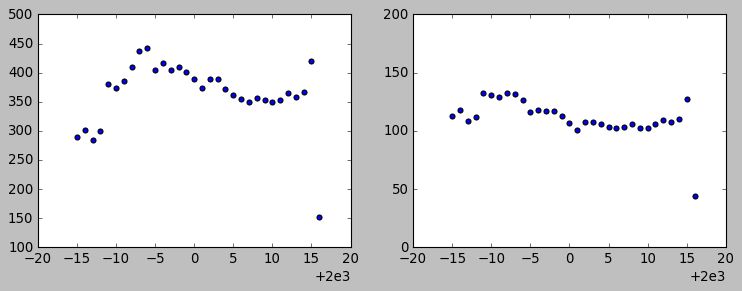

In [20]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot(221)
plt.scatter(y = m_p_y,
            x = m_p_y.index)

ax2 = plt.subplot(222)
ax2.set_ylim([0,200])
plt.scatter(y = f_p_y,
            x = f_p_y.index)
plt.subplots_adjust(right=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002079D595DA0>,
      dtype=object)

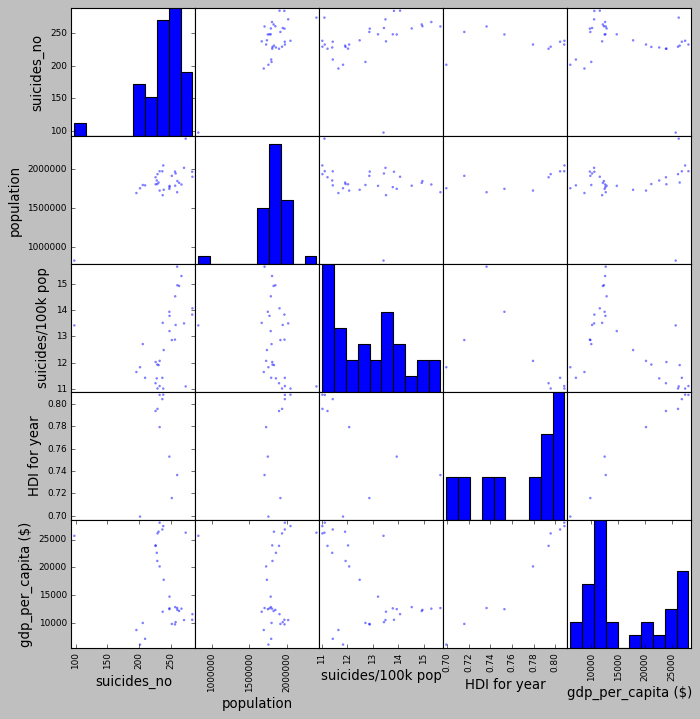

In [21]:
pd.plotting.scatter_matrix(suicide.groupby('year').mean(),figsize=(10,10))

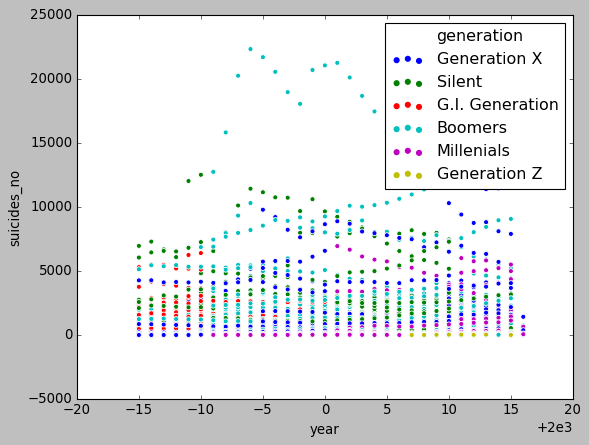

In [70]:
sns.scatterplot(suicide['year'],suicide['suicides_no'],hue=suicide['generation'])

In [60]:
#checking the highest rates of suicides per capita by age group summing all 
suicide.groupby(['age']).sum().apply(
    lambda x:  x['suicides_no']/x['population'], axis=1).sort_values()

age
5-14 years     0.000006
15-24 years    0.000094
25-34 years    0.000133
35-54 years    0.000171
55-74 years    0.000188
75+ years      0.000245
dtype: float64

Object `apply` not found.
